# Proyek Predictive Analytics: Weather-Prediction
- Nama: Rezaldi
- Email: rezaldi30082003@students.amikom.ac.id
- Id Dicoding: rezaldi_20113717
- Dataset: https://www.kaggle.com/datasets/ananthr1/weather-prediction

## Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

## Data Loading

In [2]:
# Load dataset
df = pd.read_csv("seattle-weather.csv")

# Preview dataset
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


DataFrame berisi 6 kolom. Kolom-kolom tersebut adalah:
- date: menunjukkan tanggal pengamatan cuaca.
- precipitation: menunjukkan jumlah curah hujan.
- temp_max: menunjukkan suhu maksimum.
- temp_min: menunjukkan suhu minimum.
- wind: menunjukkan kecepatan angin.
- weather: menunjukkan kondisi cuaca.

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


tipe data date dan weather adalah objek. mungkin bisa dikonversi ke datetime dan tipe data kategori untuk analisis yang lebih baik.

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['weather'] = df['weather'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(4)
memory usage: 58.8 KB


dari hasil diatas sudah menampilkan perubahan tipe data date dan weather

In [5]:
# Statistik Deskriptif
df.describe()

,date,precipitation,temp_max,temp_min,wind
count,1461,1461.000000,1461.000000,1461.000000,1461.000000
mean,2013-12-31 00:00:00,3.029432,16.439083,8.234771,3.241136
min,2012-01-01 00:00:00,0.000000,-1.600000,-7.100000,0.400000
25%,2012-12-31 00:00:00,0.000000,10.600000,4.400000,2.200000
50%,2013-12-31 00:00:00,0.000000,15.600000,8.300000,3.000000
75%,2014-12-31 00:00:00,2.800000,22.200000,12.200000,4.000000
max,2015-12-31 00:00:00,55.900000,35.600000,18.300000,9.500000
std,NaN,6.680194,7.349758,5.023004,1.437825


- precipitation: Jumlah rata-rata curah hujan adalah sekitar 3,03, menunjukkan fluktuasi yang patut dicatat (standar deviasi sekitar 6,68). Data yang berkaitan dengan curah hujan berkisar dari 0 hingga 55,9.
- temp_max: suhu maksimum rata-rata kira-kira 16,44, dengan jumlah variasi yang sederhana (standar deviasi sekitar 7,35). Suhu maksimum berfluktuasi antara -1,6 hingga 35,6.
- temp_min: suhu minimum rata-rata adalah sekitar 8,23, dengan variasi sedang (standar deviasi sekitar 5,02). Suhu minimum berosilasi antara -7,1 hingga 18,3.
- wind: kecepatan angin rata-rata sekitar 3,24, dengan jumlah variasi sedang (standar deviasi sekitar 1,44). Kecepatan angin berkisar dari 0,4 hingga 9,5.

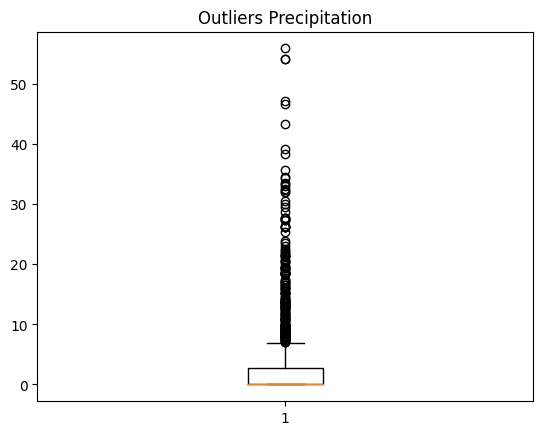

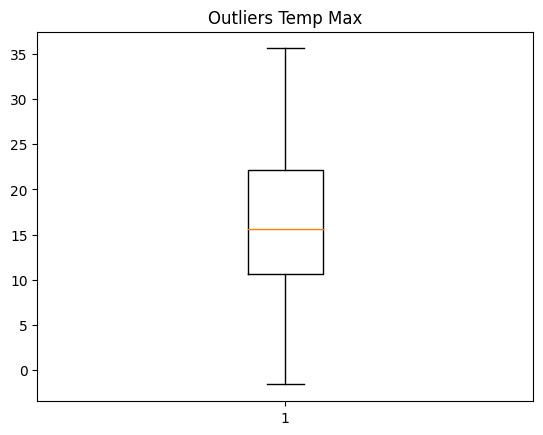

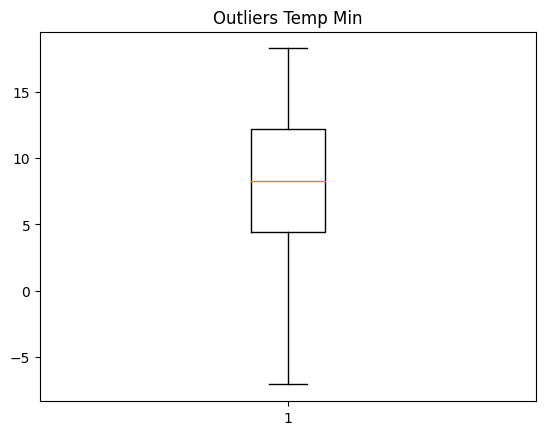

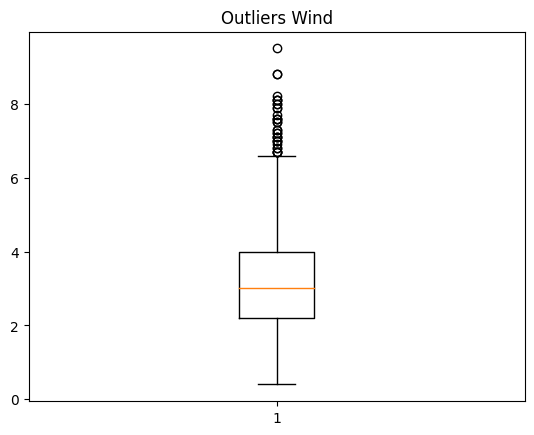

In [6]:
# Check outliers precipitation
plt.boxplot(df["precipitation"])
plt.title("Outliers Precipitation")
plt.show()

# Check outliers temp_max
plt.boxplot(df["temp_max"])
plt.title("Outliers Temp Max")
plt.show()

# Check outliers temp_min
plt.boxplot(df["temp_min"])
plt.title("Outliers Temp Min")
plt.show()

# Check outliers wind
plt.boxplot(df["wind"])
plt.title("Outliers Wind")
plt.show()

Berdasarkan output boxplot, dapat dilihat bahwa terdapat outlier pada precipitation dan wind.

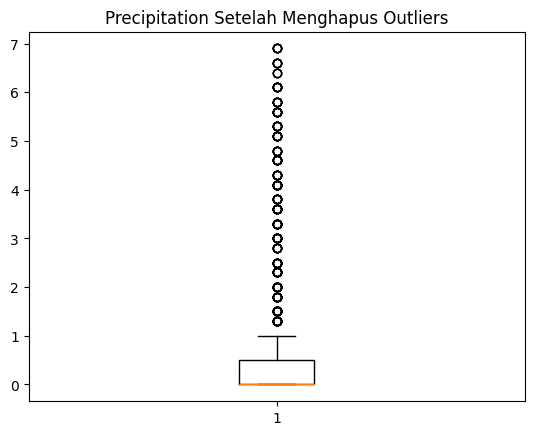

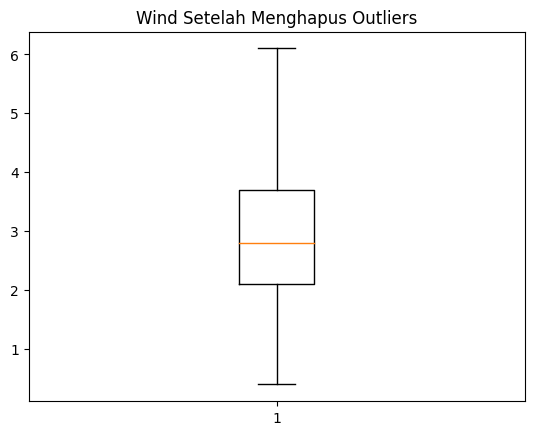

In [7]:
Q1 = df['precipitation'].quantile(0.25)
Q3 = df['precipitation'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['precipitation'] >= lower_bound) & (df['precipitation'] <= upper_bound)]

Q1 = df['wind'].quantile(0.25)
Q3 = df['wind'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['wind'] >= lower_bound) & (df['wind'] <= upper_bound)]

# Boxplot precipitation setelah outliers dihapus
plt.boxplot(df["precipitation"])
plt.title("Precipitation Setelah Menghapus Outliers")
plt.show()

# Boxplot wind setelah outliers dihapus
plt.boxplot(df["wind"])
plt.title("Wind Setelah Menghapus Outliers")
plt.show()


Berdasrkan output telah berhasil menghapus outliers di precipitation dan wind

In [8]:
# Memisahkan numerical features dan categorical features
numerical_features = df.select_dtypes(include=['float64'])  # Memilih kolom-kolom dengan tipe data float64
categorical_features = df.select_dtypes(include=['category'])  # Memilih kolom-kolom dengan tipe data category

# Menampilkan numerical features
print("Numerical Features:")
print(numerical_features.head())

# Menampilkan categorical features
print("\nCategorical Features:")
print(categorical_features.head())

Numerical Features:
   precipitation  temp_max  temp_min  wind
0            0.0      12.8       5.0   4.7
2            0.8      11.7       7.2   2.3
4            1.3       8.9       2.8   6.1
5            2.5       4.4       2.2   2.2
6            0.0       7.2       2.8   2.3

Categorical Features:
   weather
0  drizzle
2     rain
4     rain
5     rain
6     rain


berdasarkan output diatas telah berhasil memisahkan dataset berdasarkan kategori yaitu Numerical Features dan Categorical Features

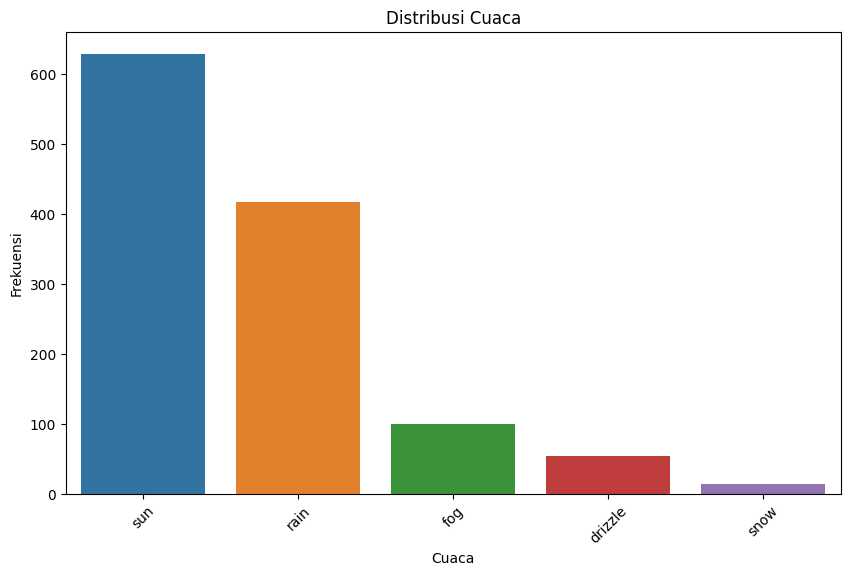

In [9]:
weather_counts = df['weather'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weather', order=weather_counts.index)
plt.title('Distribusi Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

- Kategori cuaca yang paling sering muncul dalam dataset adalah "rain"
- Kategori cuaca "sun" memiliki kemunculan yang hampir sama dengan "rain"
- Kategori cuaca "fog" memiliki kemunculan yang lebih sedikit dibandingkan dengan "rain" dan "sun"
- "drizzle" dan "snow" adalah kategori cuaca yang lebih jarang terjadi

C:\Users\Rezal\AppData\Local\Temp\ipykernel_4708\2028473378.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='date', y='temp_max', hue='weather', ci=None)


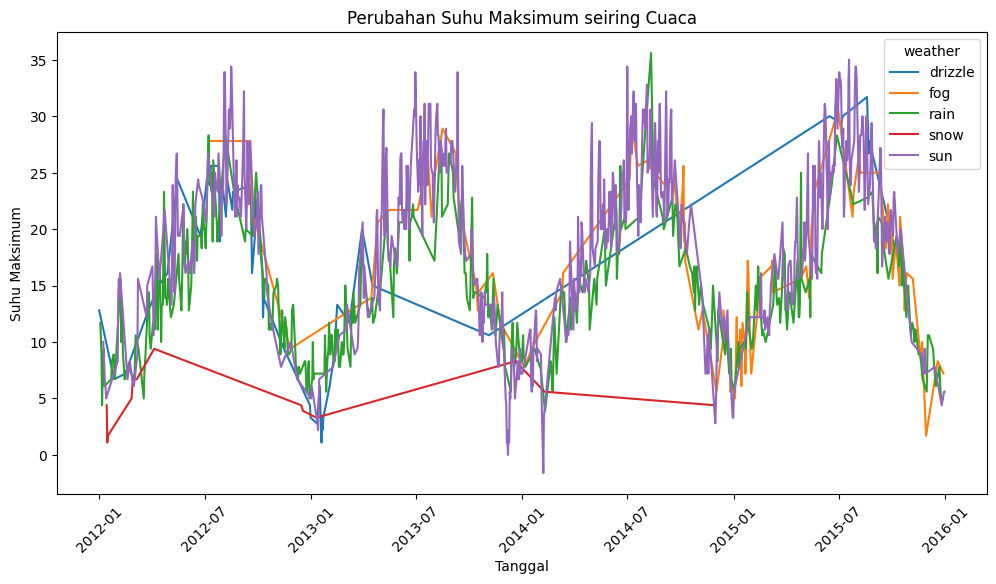

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='temp_max', hue='weather', ci=None)
plt.title('Perubahan Suhu Maksimum seiring Cuaca')
plt.xlabel('Tanggal')
plt.ylabel('Suhu Maksimum')
plt.xticks(rotation=45)
plt.show()

Dengan output ini, dapat memahami bagaimana variabel cuaca memengaruhi variabel suhu.

In [11]:
numerical_features = numerical_features.describe()
print(numerical_features)

       precipitation     temp_max     temp_min         wind
count    1211.000000  1211.000000  1211.000000  1211.000000
mean        0.763501    17.248803     8.468126     2.928406
std         1.541859     7.549602     5.182635     1.140807
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    11.100000     4.400000     2.100000
50%         0.000000    17.200000     8.900000     2.800000
75%         0.500000    23.300000    12.800000     3.700000
max         6.900000    35.600000    18.300000     6.100000


Output yang ditampilkan adalah hasil dari penghitungan statistik deskriptif untuk fitur-fitur numerik, yang meliputi "precipitation," "temp_max," "temp_min," dan "wind."

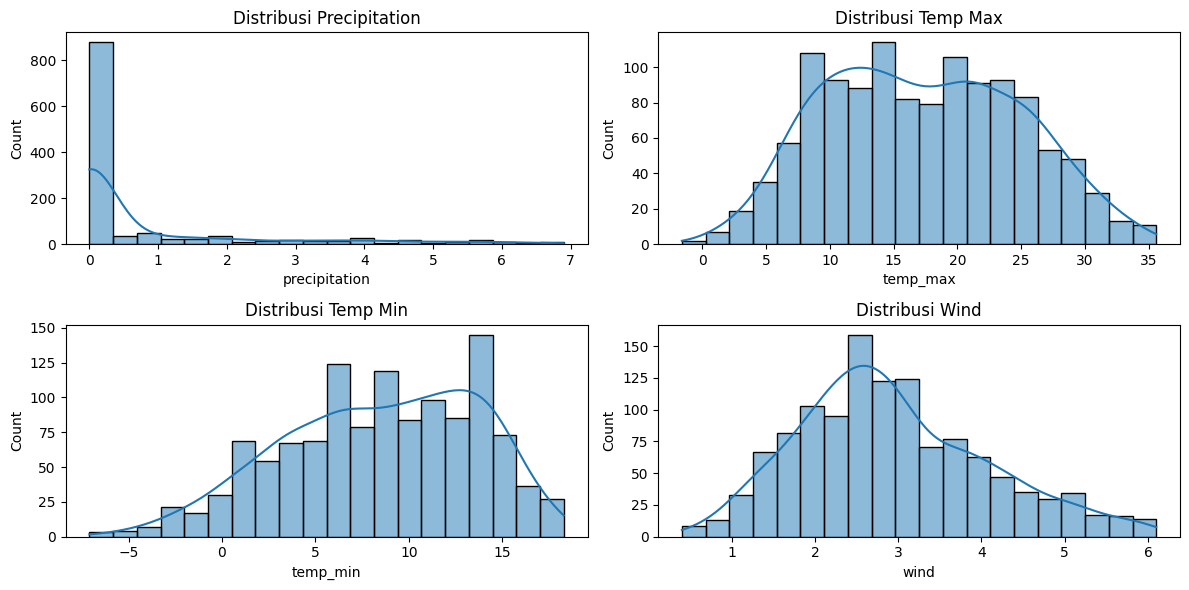

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['precipitation'], bins=20, kde=True)
plt.title('Distribusi Precipitation')

plt.subplot(2, 2, 2)
sns.histplot(df['temp_max'], bins=20, kde=True)
plt.title('Distribusi Temp Max')

plt.subplot(2, 2, 3)
sns.histplot(df['temp_min'], bins=20, kde=True)
plt.title('Distribusi Temp Min')

plt.subplot(2, 2, 4)
sns.histplot(df['wind'], bins=20, kde=True)
plt.title('Distribusi Wind')

plt.tight_layout()
plt.show()

Output menampilkan visualisasi distribusi dari masing-masing fitur numerik.

               precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.305394 -0.137997  0.176731
temp_max           -0.305394  1.000000  0.884779 -0.045549
temp_min           -0.137997  0.884779  1.000000  0.004671
wind                0.176731 -0.045549  0.004671  1.000000


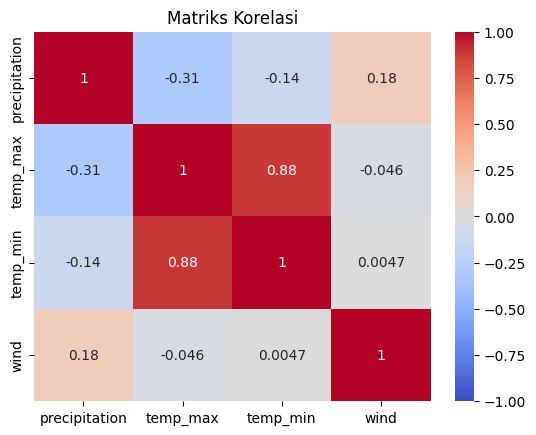

In [13]:
correlation_matrix = df[['precipitation', 'temp_max', 'temp_min', 'wind']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriks Korelasi')
plt.show()


- Terdapat korelasi negatif yang lemah (-0.34) antara tingkat presipitasi ("precipitation") dan suhu maksimum ("temp_max").
- Terdapat korelasi positif yang kuat (0.88) antara suhu maksimum ("temp_max") dan suhu minimum ("temp_min"). 
- Korelasi antara suhu minimum ("temp_min") dan tingkat presipitasi ("precipitation") serta kecepatan angin ("wind") adalah lemah dan mendekati nol, menunjukkan bahwa tidak ada korelasi yang signifikan antara variabel-variabel ini.
- Terdapat korelasi negatif yang lemah (-0.16) antara suhu maksimum ("temp_max") dan kecepatan angin ("wind").

c:\Users\Rezal\miniconda3\envs\main-ds\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


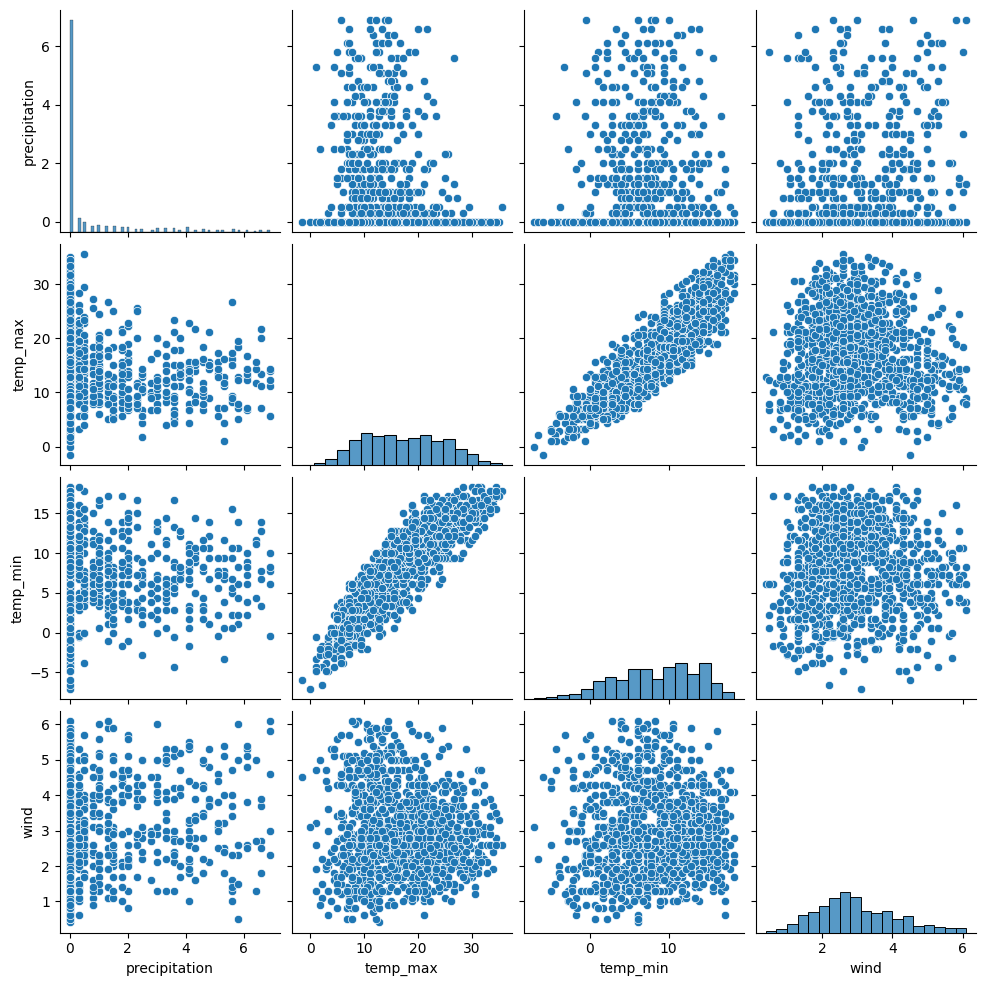

In [14]:
sns.pairplot(df[['precipitation', 'temp_max', 'temp_min', 'wind']])
plt.show()

dengan output ini kita bisa melihat hubungan antara semua pasangan variabel numerik sekaligus

## Data Preparation

In [15]:
# Encoding fitur kategori
label_encoder = LabelEncoder()
df['weather_encoded'] = label_encoder.fit_transform(df['weather'])

menggunakan LabelEncoder untuk mengubah fitur kategori weather menjadi angka

In [16]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['precipitation', 'temp_max', 'temp_min', 'wind']])

menggunakan PCA untuk mereduksi dimensi fitur numerik menjadi 2 komponen.

In [17]:
# Pembagian dataset menjadi data latih dan data uji
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

menggunakan 80% data sebagai data latih dan 20% data sebagai data uji.

In [18]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

menggunakan StandardScaler untuk melakukan standarisasi pada fitur numerik agar memiliki mean 0 dan standar deviasi 1

## Model Development

In [19]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Train the KNN model
knn.fit(X_train_scaled, y_train)

# Make predictions on the training and test sets
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy (KNN):", train_accuracy)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (KNN):", test_accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)
print("Classification Report (KNN):\n", class_report)

Training Accuracy (KNN): 0.7861570247933884
Test Accuracy (KNN): 0.7860082304526749
Classification Report (KNN):
               precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        12
         fog       0.60      0.17      0.26        18
        rain       0.96      0.80      0.87        82
        snow       0.00      0.00      0.00         2
         sun       0.74      0.95      0.83       129

    accuracy                           0.79       243
   macro avg       0.46      0.38      0.39       243
weighted avg       0.76      0.79      0.76       243



c:\Users\Rezal\miniconda3\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rezal\miniconda3\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rezal\miniconda3\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Model KNN memiliki akurasi yang cukup baik (sekitar 78%).
- Model ini lebih baik dalam memprediksi kelas "rain" dan "sun" daripada kelas-kelas lainnya.
- Model memiliki kesulitan dalam mengklasifikasikan kelas-kelas minor seperti "drizzle", "fog", dan "snow".

In [20]:
# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
random_forest.fit(X_train_scaled, y_train)

# Make predictions on the training and test sets
y_train_pred_rf = random_forest.predict(X_train_scaled)
y_test_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model on the training set
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print("Training Accuracy (Random Forest):", train_accuracy_rf)

# Evaluate the model on the test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Test Accuracy (Random Forest):", test_accuracy_rf)

# Generate a classification report
class_report_rf = classification_report(y_test, y_test_pred_rf, target_names=label_encoder.classes_)
print("Classification Report (Random Forest):\n", class_report_rf)

Training Accuracy (Random Forest): 0.996900826446281
Test Accuracy (Random Forest): 0.8189300411522634
Classification Report (Random Forest):
               precision    recall  f1-score   support

     drizzle       0.17      0.08      0.11        12
         fog       0.38      0.28      0.32        18
        rain       0.95      0.93      0.94        82
        snow       0.00      0.00      0.00         2
         sun       0.81      0.91      0.86       129

    accuracy                           0.82       243
   macro avg       0.46      0.44      0.45       243
weighted avg       0.79      0.82      0.80       243



c:\Users\Rezal\miniconda3\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rezal\miniconda3\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rezal\miniconda3\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Random Forest memiliki tingkat akurasi yang baik pada data uji, mencapai sekitar 81.89%. Namun, ada beberapa kelas (seperti 'drizzle', 'fog', dan 'snow') di mana model memiliki kinerja yang kurang baik dengan precision dan recall rendah. Ini menunjukkan bahwa model kemungkinan tidak cukup baik dalam memprediksi cuaca-cuaca tersebut.

In [21]:
# Create a Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the Gradient Boosting model
gradient_boosting.fit(X_train_scaled, y_train)

# Make predictions on the training and test sets
y_train_pred_gb = gradient_boosting.predict(X_train_scaled)
y_test_pred_gb = gradient_boosting.predict(X_test_scaled)

# Evaluate the model on the training set
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
print("Training Accuracy (Gradient Boosting):", train_accuracy_gb)

# Evaluate the model on the test set
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
print("Test Accuracy (Gradient Boosting):", test_accuracy_gb)

# Generate a classification report
class_report_gb = classification_report(y_test, y_test_pred_gb, target_names=label_encoder.classes_)
print("Classification Report (Gradient Boosting):\n", class_report_gb)

Training Accuracy (Gradient Boosting): 0.8966942148760331
Test Accuracy (Gradient Boosting): 0.8024691358024691
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

     drizzle       0.17      0.08      0.11        12
         fog       0.30      0.17      0.21        18
        rain       0.94      0.91      0.93        82
        snow       0.00      0.00      0.00         2
         sun       0.79      0.90      0.84       129

    accuracy                           0.80       243
   macro avg       0.44      0.41      0.42       243
weighted avg       0.77      0.80      0.78       243



model Gradient Boosting memiliki akurasi yang baik pada data uji sekitar 80.25%. Namun, performa model bervariasi di antara kelas-kelas cuaca, dengan kelas "rain" memiliki performa terbaik.